In [1]:
from clients.binance_client import BinanceClient, load_secrets
from analysis.indicators import calcular_indicadores
from visualization.chart_plotter import graficar_analisis, recalc


def ejemplo_uso_basico():
    """Ejemplo básico: obtener datos, calcular indicadores y graficar"""
    
    # 1. Cargar credenciales (opcional para datos públicos)
    # api_key, api_secret = load_secrets()
    # binance = BinanceClient(api_key, api_secret)
    
    # Sin credenciales (solo datos públicos)
    binance = BinanceClient()
    
    # 2. Obtener datos históricos
    symbol = 'BNBUSDT'
    interval = '1m'
    limit = 500
    
    print(f"Obteniendo datos de {symbol}...")
    df = binance.history(symbol=symbol, interval=interval, limit=limit)
    print(f"Datos obtenidos: {len(df)} velas")
    
    # 3. Calcular indicadores
    print("Calculando indicadores...")
    
    # Obtener fecha del último timestamp del DataFrame
    fecha_str = df.index[-1].strftime('%Y-%m-%d')
    
    # Calcular comisión específica de Binance (ahora es un método del cliente)
    comision = binance.calcular_comision(symbol)
    
    datos = calcular_indicadores(symbol, fecha_str, interval, df, comision, display=0)
    
    # 4. Graficar
    print("Generando gráfico...")
    graficar_analisis(datos)
    
    # Mostrar resultados
    print(f"\nNiveles de resistencia: {datos['resistance_levels']}")
    print(f"Niveles de soporte: {datos['support_levels']}")
    print(f"Pendiente resistencia: {datos['slope_resistance']}")
    print(f"Pendiente soporte: {datos['slope_support']}")


Obteniendo datos de BNBUSDT...
Datos obtenidos: 500 velas
Calculando indicadores...
Generando gráfico...


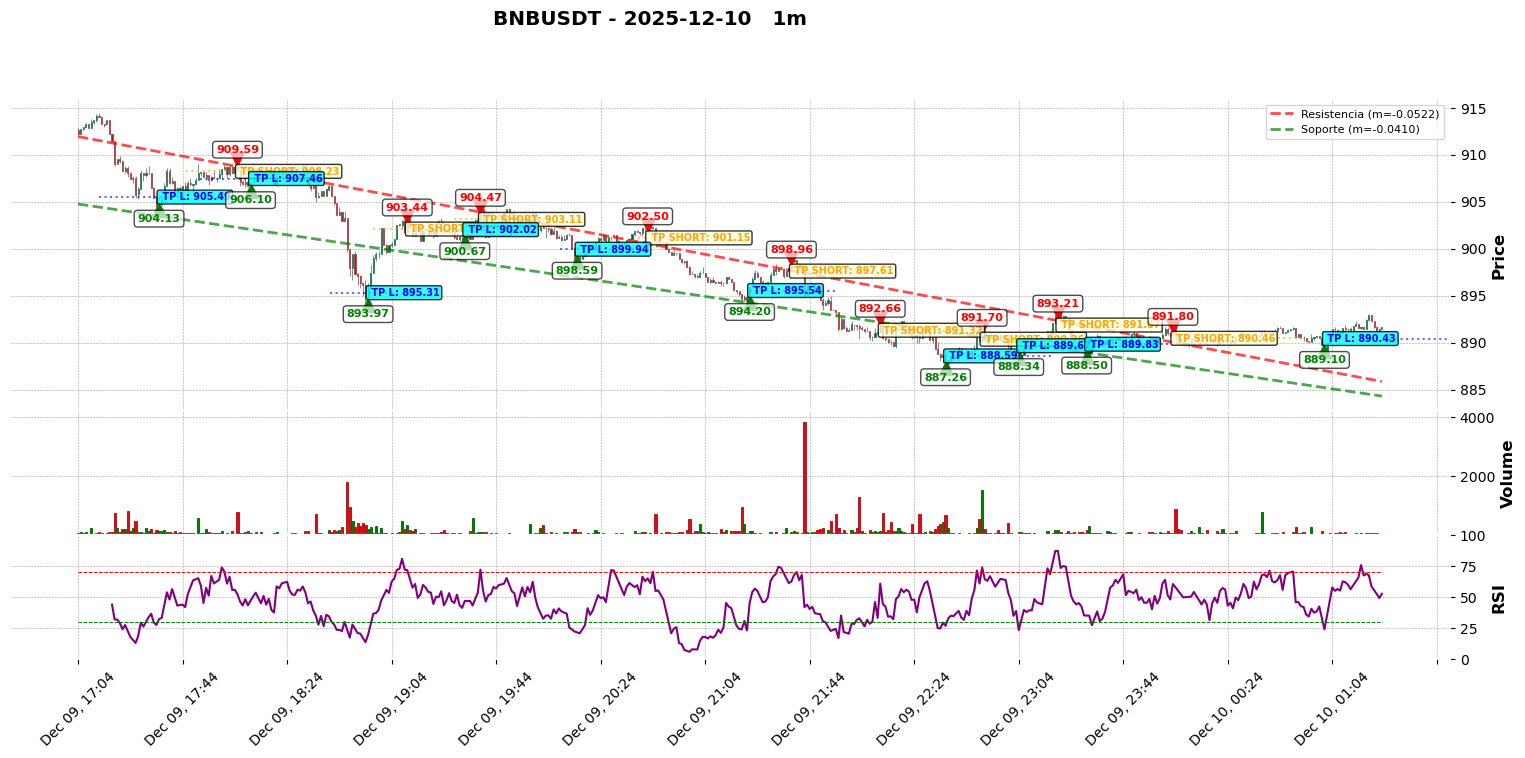


Niveles de resistencia: [909.59, 903.44, 904.47, 902.5, 898.96, 892.66, 891.7, 893.21, 891.8]
Niveles de soporte: [904.13, 906.1, 893.97, 900.67, 898.59, 894.2, 887.26, 888.34, 888.5, 889.1]
Pendiente resistencia: -0.0522213392230532
Pendiente soporte: -0.04096857916664495


In [2]:
ejemplo_uso_basico()